# Supervised Learning Project: Predicción de distancia para competencias de ultra trail running

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Introducción

### Motivation y Justificación

#### ¿Qué es el running?

El ***running*** es una forma de actividad física que consiste en el desplazamiento repetitivo del cuerpo a lo largo de una distancia durante determinados intervalos de tiempo, con el objetivo de completar un recorrido. Esta práctica involucra la activación de múltiples grupos musculares, cuyo rendimiento está condicionado principalmente por la capacidad física y el nivel de entrenamiento del individuo. Factores externos, como el clima o el desnivel del terreno, también influyen, aunque en menor medida.

Desde una perspectiva de desempeño, el *running* permite medir la eficiencia del corredor en función del tiempo requerido para cubrir una distancia determinada, o viceversa, la distancia alcanzada en un tiempo fijo. Debido a que esta actividad se realiza generalmente en vías asfaltadas y con poco o ningún desnivel, su comportamiento es altamente **predecible**. Esta predictibilidad facilita la planificación y el seguimiento del rendimiento con base en variables fisiológicas y de entrenamiento previamente conocidas.

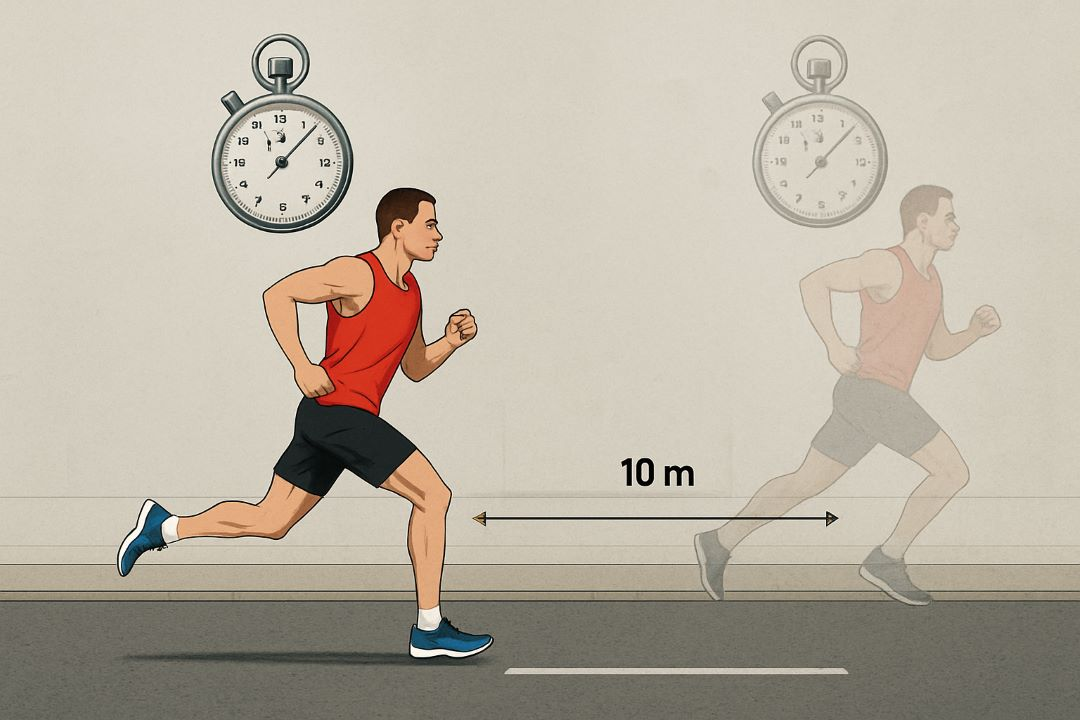
*Generated with ChatGPT with prompt "Generate an image of a runner athlete running on a street, viewed from the side with an image of an analog stopwatch above his head, and a ghosted image of the same runner about 10 meters ahead with the stopwatch above his head having advanced a few seconds. Draw a metered line below the runner and it's ghosted image indicating the displaced space between them."*

#### ¿Qué es el trail running?

El ***trail running***, al igual que el running, es una actividad física que consiste en desplazar el cuerpo a lo largo de una distancia de forma repetida. Sin embargo, se diferencia del running tradicional en que se practica principalmente en senderos y caminos de tercer orden. Esta disciplina conlleva múltiples condiciones variables a lo largo del recorrido, como la morfología del terreno, el desnivel y las condiciones climáticas, lo que dificulta predecir con precisión el desarrollo y resultado de la actividad. Estas variables adicionales suponen un reto importante para la planificación estratégica, ya que complican la tarea de optimizar el rendimiento del deportista durante toda la ruta.

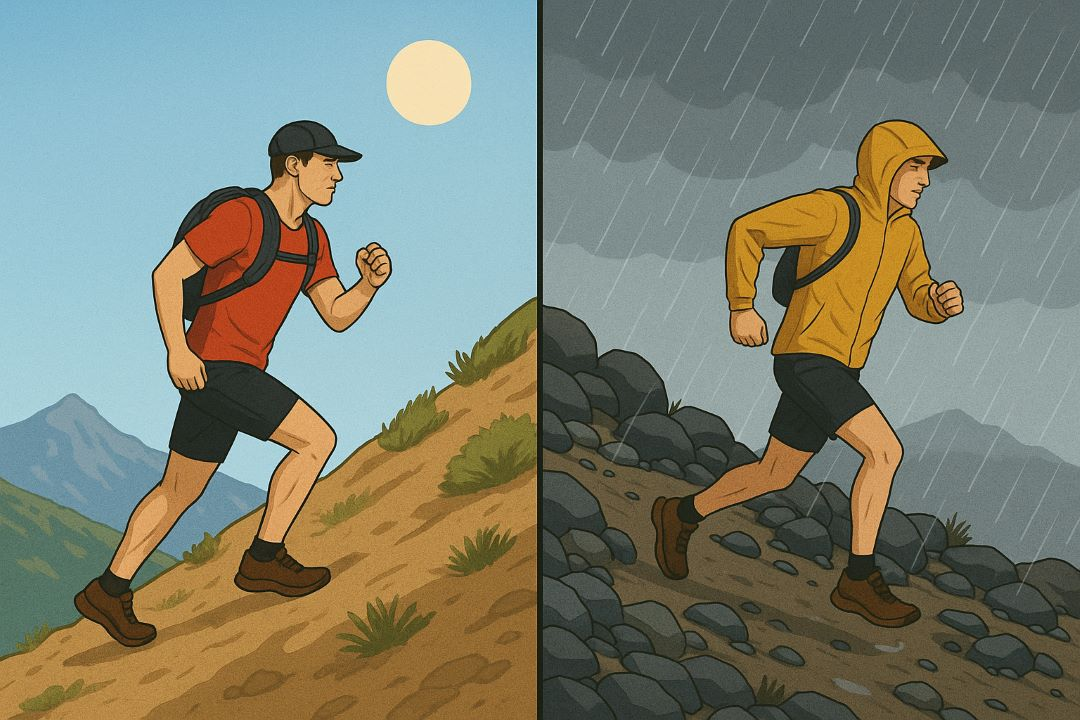
*Generated with ChatGPT with prompt "Generate an image consisting on 2 images side-by-side. On the left hand side, draw a trail runner viewed from the side power walking uphill on a mountain trail on a steep hill on a sunny day with clear sky. On the right hand side, draw the same trail runner using a rain jacket, running downhill on a rocky trail on a rainy day with cloudy sky."*

#### ¿Qué es el *ultra* trail running?

El ***ultra trail running*** es una disciplina de *ultra resistencia*, entendida como toda actividad física cuya duración supera las 4 horas, pudiendo incluso extenderse por varios días. Algunas fuentes ([Dynafit](https://www.dynafit.com/what-is-trail-running)) definen esta categoría también en función de la distancia, señalando que excede los 42.195 km de una maratón convencional. En el caso particular del *trail running*, es común que recorridos que superan esta distancia también impliquen tiempos superiores a las 4 horas, aunque esto depende en gran medida del desnivel acumulado y de la capacidad física del atleta.

En el *ultra trail running*, los factores externos como las condiciones climáticas tienen una mayor probabilidad de variar significativamente debido a la prolongada duración del evento. Esto obliga a los atletas a ajustar su estrategia de forma dinámica durante el recorrido. A diferencia de los deportes de resistencia de corta o media duración, las disciplinas de ultra resistencia presentan desafíos fisiológicos particulares. Entre ellos destacan el desgaste energético continuo, la pérdida de electrolitos y el impacto acumulativo sobre los sistemas musculoesquelético y metabólico.

Estos factores generan un déficit fisiológico que debe ser compensado periódicamente, por lo que la estrategia nutricional —tanto previa como durante la actividad— juega un papel crucial en el rendimiento. Asimismo, el control del ritmo o intensidad es fundamental, ya que un esfuerzo excesivo puede provocar una acumulación elevada de ácido láctico, incrementando los niveles de fatiga y comprometiendo el desempeño del deportista a largo plazo.


#### ¿Por qué es importante?

En la práctica del *ultra trail running*, contar con una estimación del tiempo total requerido para completar un recorrido es fundamental. Esta estimación, aunque generalmente se realiza con un amplio margen de error, suele basarse en experiencias previas en recorridos de características similares. Dicha información es clave para una adecuada planificación estratégica, especialmente en contextos competitivos, donde el objetivo principal es optimizar el rendimiento y completar el recorrido en el menor tiempo posible.

Tanto el *trail running* como el *ultra trail running* se caracterizan por desarrollarse, en muchos casos, bajo condiciones de autosuficiencia. Esto implica que el deportista debe ser responsable de portar el equipo, alimentos y líquidos necesarios para afrontar con éxito el trayecto. En este contexto, una parte esencial de la estrategia consiste en calcular y transportar la cantidad justa de recursos entre los puntos de control. Llevar más de lo necesario implica una mayor carga, lo que se traduce en un aumento del gasto energético y del tiempo total de recorrido. Por el contrario, llevar una cantidad insuficiente conlleva el riesgo de deshidratación, hipoglucemia o descompensación, lo cual puede comprometer gravemente la salud y el desempeño del atleta.

Contar con una estimación del tiempo total y de los tiempos parciales por segmento permite al deportista ajustar su ritmo de manera informada. Por ejemplo, si en un determinado punto del recorrido el avance ha sido menor al estimado, se podría considerar aumentar la intensidad para recuperar tiempo, siempre que las condiciones fisiológicas lo permitan. Del mismo modo, si el atleta se encuentra por delante del tiempo proyectado, podría optar por moderar el esfuerzo con el fin de evitar una acumulación excesiva de ácido láctico y conservar energía para los tramos restantes.


## EDA (Exploratory Data Analysis)

### Data Preprocessing

Antes de realizar el análisis exploratorio de datos (EDA), es necesario filtrar y preprocesar la información contenida en la carpeta `full-data`, la cual agrupa *todas* las sesiones de entrenamiento registradas, independientemente de la disciplina o la duración.

El enfoque de este proyecto se centra en analizar sesiones de entrenamiento de *trail running* cuya duración esté comprendida entre 4 y 6 horas. Inicialmente, se consideraron sesiones superiores a las 3 horas; sin embargo, esto resultó en un conjunto de datos demasiado extenso —casi 3 millones de registros— lo que impactaba negativamente en los tiempos de procesamiento y análisis. Las sesiones están almacenadas en formato JSON, con cada métrica indexada por su respectivo `timestamp` y estructurada en claves individuales.

Según lo indicado en el artículo [*How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls*](https://medium.com/data-science/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424), para ciertas métricas es más relevante considerar la diferencia con respecto a la muestra anterior en la secuencia, en lugar del valor absoluto. Por ello, se generarán nuevas columnas derivadas bajo este criterio.

Un aspecto técnico importante es que los registros de altitud no están sincronizados con la frecuencia general de muestreo, ya que el sensor de altura opera a intervalos distintos. Se evaluaron varias estrategias para abordar este problema. Una opción fue realizar un *resampling* completo del conjunto de datos para homogeneizar la frecuencia de muestreo. Otra alternativa consistió en aplicar interpolación sobre los valores de altitud para evitar saltos bruscos entre intervalos. Finalmente, se optó por utilizar una técnica de media móvil (*Rolling Mean*), como se detalla en el artículo [*Advanced Feature Engineering for Time Series Data*](https://medium.com/@rahulholla1/advanced-feature-engineering-for-time-series-data-5f00e3a8ad29).

Dado el carácter altamente variable y no cíclico de las sesiones de *trail running*, no se espera observar patrones con periodicidad ni componentes estacionales, como suele ser común en otras series de tiempo abordadas en la literatura.

Una vez procesadas las métricas de interés, los datos se almacenarán en formato CSV en la carpeta `long-tr-data`, para facilitar su posterior análisis en formato tabular.

In [ ]:
%pip install graphviz --quiet

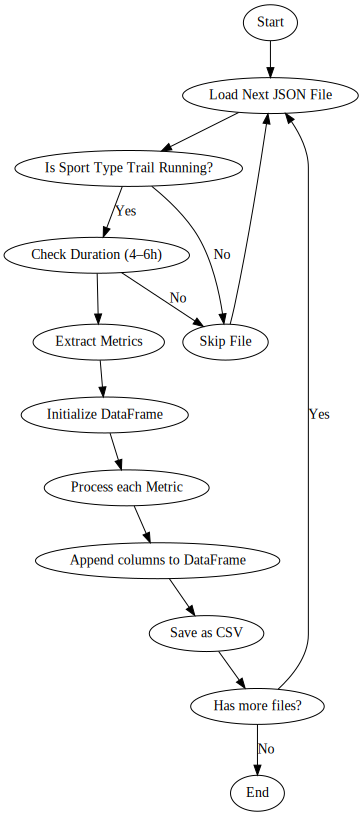

In [ ]:
from graphviz import Digraph
from IPython.display import display

# Create a directed graph
dot = Digraph()

dot.node('A', 'Start')
dot.node('L', 'Load Next JSON File')
dot.node('B', 'Is Sport Type Trail Running?')
dot.node('C', 'Check Duration (4–6h)')
dot.node('D', 'Extract Metrics')
dot.node('E', 'Initialize DataFrame')
dot.node('G', 'Process each Metric')
dot.node('H', 'Append columns to DataFrame')
dot.node('I', 'Save as CSV')
dot.node('J', 'Has more files?')
dot.node('Y', 'Skip File')
dot.node('Z', 'End')

dot.edges(['AL', 'LB', 'CD', 'DE', 'EG', 'GH', 'HI', 'IJ', 'YL'])
dot.edge('B', 'C', label='Yes')
dot.edge('B', 'Y', label='No')
dot.edge('C', 'Y', label='No')
dot.edge('J', 'L', label='Yes')
dot.edge('J', 'Z', label='No')
display(dot)

In [ ]:
# Install rdflib to use isodate
%pip install rdflib
%pip install isodate

In [ ]:
import traceback
import pandas as pd
import os
import json
import isodate

# from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
import time
import sys

# Create the output directory if it doesn't exist
# output_dir = "/content/drive/MyDrive/ml-data/long-tr-data"
output_dir = "/home/eaguayo/workspace/ml-project/data/long-tr-data"
os.makedirs(output_dir, exist_ok=True)

# Iterate through all files in the ./full-data folder
input_dir = "/home/eaguayo/workspace/ml-project/data/full-data"
# input_dir = "/content/drive/MyDrive/ml-data/full-data"
count = 0
skipped = 0
start_hours = 4
end_hours = 6

# Note: Following code was partially Generated with Copilot autocomplete feature
# No specific prompts were used
def process_file(file_name):
    file_path = f"{input_dir}/{file_name}"
    try:
        with open(file_path, "r") as f:
            data = json.load(f)

        exercise = data.get("exercises", [])[0]

        # 1. check if the sport corresponds to trail running and if the duration is greater than 3 hours
        #    also check if the file has already been processed
        sport = exercise.get("sport")
        duration_iso = exercise.get("duration")
        duration = isodate.parse_duration(duration_iso).total_seconds()

        if (
            sport != "TRAIL_RUNNING"
            or duration < start_hours * 3600
            or duration > end_hours * 3600
        ):
            return False

        # Skip processing if the output file already exists
        output_file_name = f"{output_dir}/{file_name.replace('.json', '.csv')}"
        if os.path.exists(output_file_name):
            return False

        # 2. Extract available data ---
        print(f"Processing file: {file_name}")
        start_time = time.time()

        sample_features = [
            "heartRate",
            "altitude",
            "distance",
            "temperature",
            "cadence",
            "speed",
        ]
        samples = exercise.get("samples", {})

        # Initialize main dataframe with heart rate samples
        df = pd.DataFrame(
            [
                {
                    "timestamp": pd.to_datetime(sample["dateTime"]),
                    "heartRate": sample["value"] if "value" in sample else None,
                }
                for sample in samples.get("heartRate", [])
            ]
        )

        # Date
        df["date"] = df["timestamp"].dt.date

        # Calculate timestamp diff and add it to the dataframe as a new column
        df["duration"] = df["timestamp"].diff().dt.total_seconds().cumsum().fillna(0)

        # Process and merge other sample types
        for sample_feature in sample_features[1:]:  # Skip heartRate (already in df)
            sample_data = samples.get(sample_feature, [])
            if not sample_data:
                continue
            temp_df = pd.DataFrame(
                [
                    {
                        "timestamp": pd.to_datetime(sample["dateTime"]),
                        sample_feature: sample["value"] if "value" in sample else None,
                    }
                    for sample in sample_data
                ]
            )
            if sample_feature == "distance":
                # Calculate distance difference
                temp_df["distance_diff"] = temp_df[sample_feature].diff().fillna(0)
            if sample_feature == "altitude":
                # Smooth altitude data
                temp_df[sample_feature] = (
                    temp_df[sample_feature]
                    .rolling(window=5, min_periods=1, center=True)
                    .mean()
                )
                # Calculate elevation difference
                temp_df["elevation_diff"] = temp_df[sample_feature].diff().fillna(0)
                # Calculate elevation gain
                temp_df["elevation_gain"] = (
                    temp_df["elevation_diff"].clip(lower=0).cumsum().fillna(0)
                )
                # Calculate elevation loss
                temp_df["elevation_loss"] = (
                    temp_df["elevation_diff"].clip(upper=0).cumsum().fillna(0)
                )

            if sample_feature in df.columns:
                # Within a second is very likely that the same sample is repeated
                temp_df[sample_feature] = temp_df[sample_feature].fillna(method="ffill")
            df = pd.merge(df, temp_df, on="timestamp", how="left")

        # Save the dataframe to a CSV file
        df.to_csv(output_file_name, index=False)
        end_time = time.time()
        print(f"Saved processed data to: {output_file_name}")
        print(f"Processing time for {file_name}: {end_time - start_time:.2f} seconds")
        return True
    except FileNotFoundError:
        print(f"Error: File not found at path: {file_name}")
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in file: {file_name}")
    except Exception as e:
        exc_type, exc_value, exc_traceback = sys.exc_info()
        print(f"An unexpected error occurred in file: {file_name}")
        print(f"With error {exc_type}: {exc_value}")
        print("Traceback:")
        traceback.print_exception(exc_type, exc_value, exc_traceback)
    return False


# Get the list of files
files = os.listdir(input_dir)

# Process files sequentially
for file_name in tqdm(files):
    if process_file(file_name):
        count += 1
        # break # Uncomment to process only the first file for testing
    else:
        skipped += 1

# Process files in parallel with a progress bar
# TODO: Does not seem to work well from vscode ipynb with local kernel
#   or remote jupyter server runtime. Maybe split to a separate .py script file.
# with ThreadPoolExecutor(max_workers=8) as executor:
#     futures = {executor.submit(process_file, file_name): file_name for file_name in files}
#     for future in tqdm(as_completed(futures), total=len(futures)):
#         if future.result():
#             count += 1

print(f"Skipped {skipped} files.")
print(f"Processed {count} files.")

100%|██████████| 1468/1468 [00:46<00:00, 31.83it/s]

Skipped 1468 files.
Processed 0 files.


### Análisis de los datos

Luego de procesar los datos se procede a realizar un EDA sobre los datos almacenados en la carpeta `long-tr-data`. El objetivo es tener un entedimiento del comportamiento de métricas como ritmo cardiaco, altitud, distancia, velocidad, entre otras e identificar patrones o comportamientos que podrían ser útiles.

In [ ]:
# Import requiered libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

# Define the directory containing the processed data
# data_dir = '/content/drive/MyDrive/ml-data/long-tr-data'
data_dir = "/home/eaguayo/workspace/ml-project/data/long-tr-data"
# Get the training files list
training_files=os.listdir(data_dir)

In [ ]:
# Load and process all CSV files
data_frames = []
for file_name in training_files:
    file_path = os.path.join(data_dir, file_name)
    df = pd.read_csv(file_path)
    # Downsample into 2 seconds intervals
    # For time execution reasons... ¯\_(ツ)_/¯
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)
    # Temporarily drop the date column to avoid resampling issues
    df.drop(columns=['date'], inplace=True)
    df = df.resample('2S').mean().reset_index()
    df["date"] = df["timestamp"].dt.date
    # Fill heart rate NaN values with the mean of the column
    df["heartRate"].fillna(df["heartRate"].mean(), inplace=True)
    # Fill other NaN values with the closest values of the column or 0
    df["cadence"].fillna(method="ffill", inplace=True)
    df["speed"].fillna(method="ffill", inplace=True)
    df["distance"].fillna(method="ffill", inplace=True)
    df["cadence"].fillna(0, inplace=True)
    df["speed"].fillna(0, inplace=True)
    df["distance"].fillna(0, inplace=True)
    data_frames.append(df)

# Combine all data
data = pd.concat(data_frames, ignore_index=True)

# Display basic information about the dataset
print(data.info())

# Display summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445949 entries, 0 to 445948
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       445949 non-null  datetime64[ns]
 1   heartRate       445949 non-null  float64       
 2   duration        445949 non-null  float64       
 3   altitude        445949 non-null  float64       
 4   elevation_diff  445949 non-null  float64       
 5   elevation_gain  445949 non-null  float64       
 6   elevation_loss  445949 non-null  float64       
 7   distance        445949 non-null  float64       
 8   distance_diff   445949 non-null  float64       
 9   temperature     445949 non-null  float64       
 10  cadence         445949 non-null  float64       
 11  speed           445949 non-null  float64       
 12  date            445949 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 44.2+ MB
None
                

In [ ]:
random.seed(45)  # For reproducibility
sample_data_frames = random.sample(data_frames, 10)

### Gráficas de variables con respecto al tiempo

Realizamos unas gráficas para entender el comportamiento de las variables sobre el tiempo de algunas sesiones de entrenamiento escogidas al azar. Por lo pronto explorando el *ritmo cardíaco*, *altitud* y *velocidad*

                timestamp  heartRate  duration   altitude  elevation_diff  \
0     2023-12-29 09:07:50       77.0       0.5  3148.6220          0.0000   
1     2023-12-29 09:07:52       78.5       2.5  3148.7135          0.0915   
2     2023-12-29 09:07:54       80.0       4.5  3149.0795          0.1830   
3     2023-12-29 09:07:56       80.5       6.5  3149.5521          0.2896   
4     2023-12-29 09:07:58       81.5       8.5  3150.1615          0.3047   
...                   ...        ...       ...        ...             ...   
10594 2023-12-29 15:00:58       93.0   21188.5  3152.5840          0.0000   
10595 2023-12-29 15:01:00       94.0   21190.5  3152.5840          0.0000   
10596 2023-12-29 15:01:02       95.0   21192.5  3152.5840          0.0000   
10597 2023-12-29 15:01:04       95.0   21194.5  3152.5840          0.0000   
10598 2023-12-29 15:01:06       95.0   21196.0  3152.5840          0.0000   

       elevation_gain  elevation_loss      distance  distance_diff  \
0    

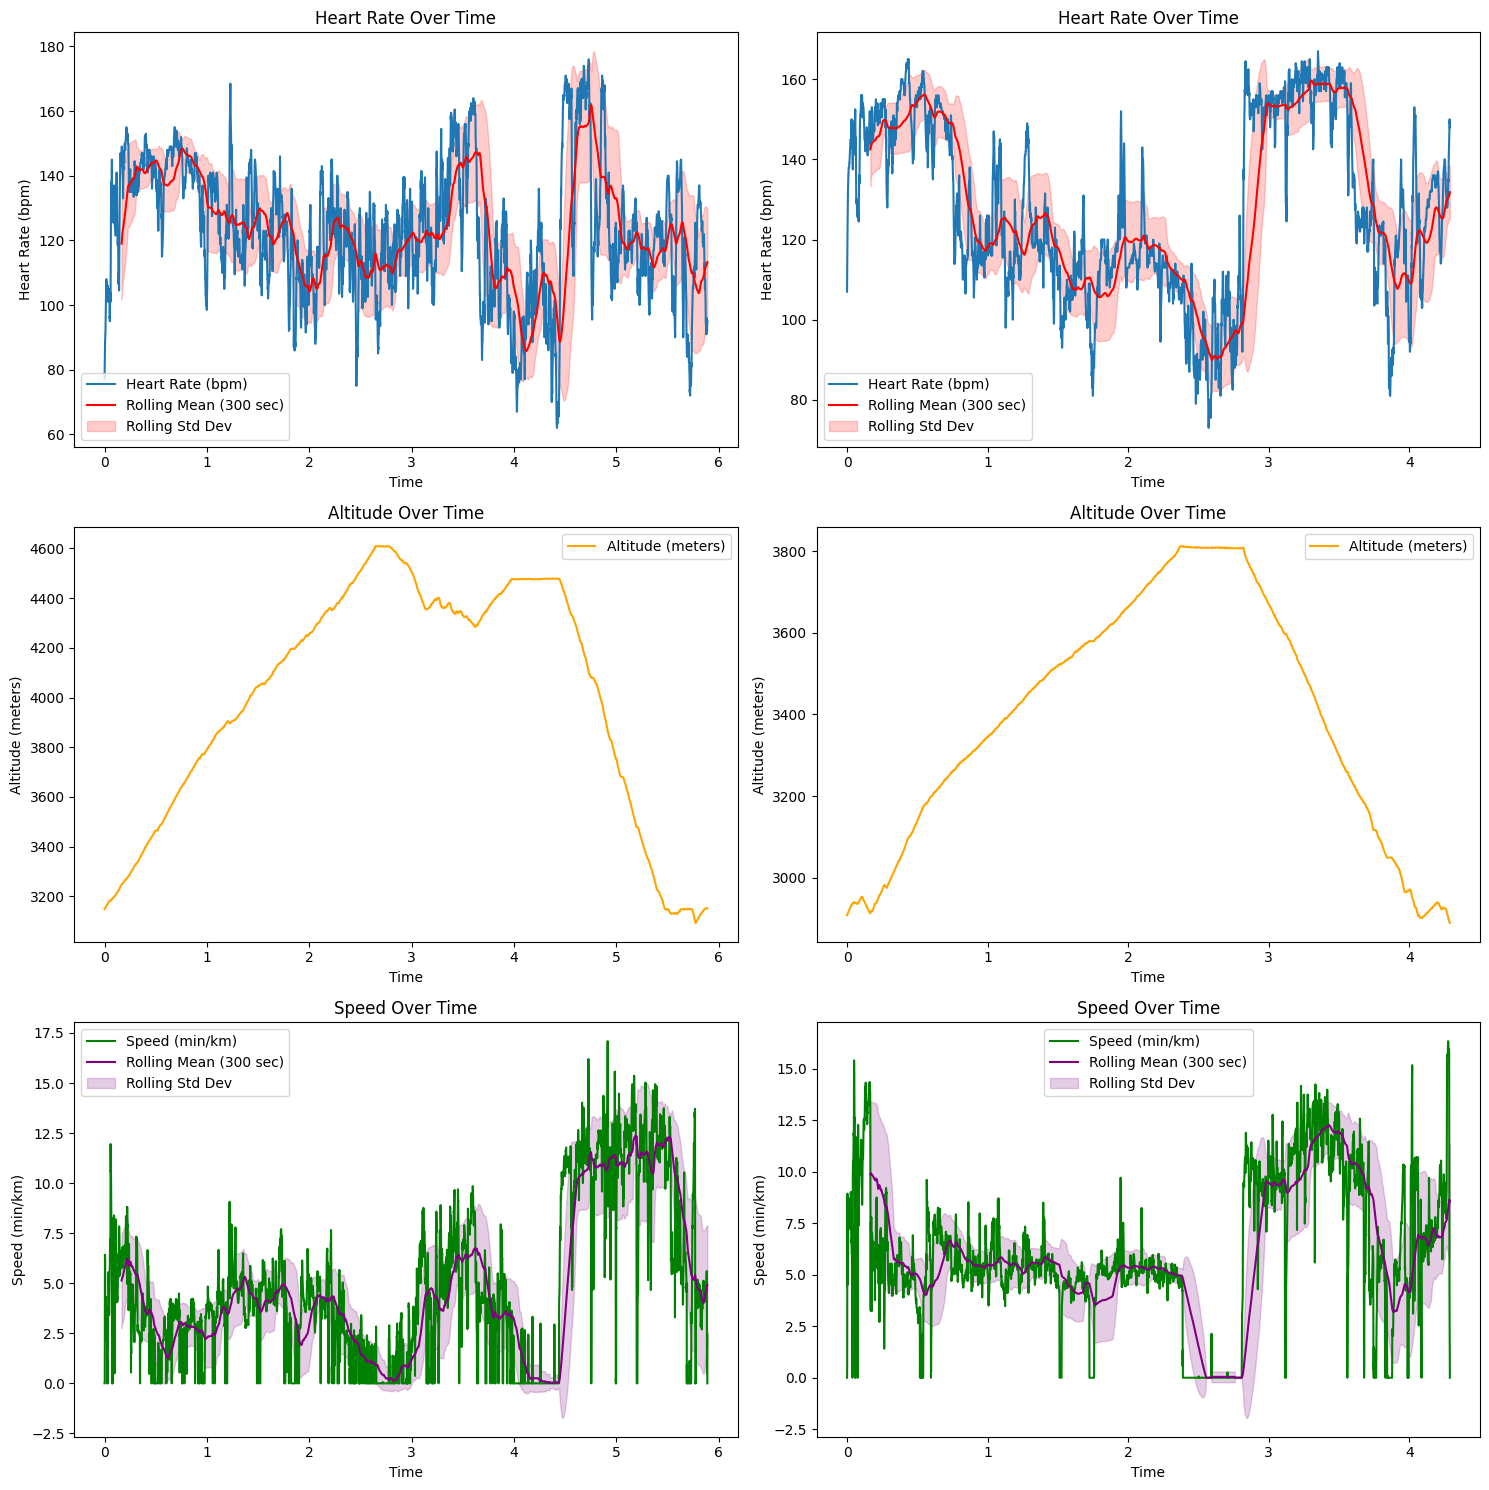

In [ ]:
# Function to plot time series data for a single training session
def plot_time_series(df, axes):
    # Convert duration from seconds to hours for x-axis
    time_hours = df["duration"] / 3600

    # Plot heart rate over time
    # Calculate rolling mean and standard deviation for heart rate
    hr_index = 0
    hr_window = 300
    hr_rolling_mean = df["heartRate"].rolling(window=hr_window).mean()
    hr_rolling_std = df["heartRate"].rolling(window=hr_window).std()
    axes[hr_index].plot(time_hours, df["heartRate"], label="Heart Rate (bpm)")
    axes[hr_index].plot(
        time_hours,
        hr_rolling_mean,
        label=f"Rolling Mean ({hr_window} sec)",
        color="red",
    )
    axes[hr_index].fill_between(
        time_hours,
        hr_rolling_mean - hr_rolling_std,
        hr_rolling_mean + hr_rolling_std,
        color="red",
        alpha=0.2,
        label="Rolling Std Dev",
    )
    axes[hr_index].set_title("Heart Rate Over Time")
    axes[hr_index].set_xlabel("Time")
    axes[hr_index].set_ylabel("Heart Rate (bpm)")
    axes[hr_index].legend()

    # Plot altitude over time
    a_index = 1
    axes[a_index].plot(
        time_hours, df["altitude"], label="Altitude (meters)", color="orange"
    )
    axes[a_index].set_title("Altitude Over Time")
    axes[a_index].set_xlabel("Time")
    axes[a_index].set_ylabel("Altitude (meters)")
    axes[a_index].legend()

    # Plot speed over time
    s_index = 2
    s_window = 300
    s_rolling_mean = df["speed"].rolling(window=s_window).mean()
    s_rolling_std = df["speed"].rolling(window=s_window).std()
    axes[s_index].plot(time_hours, df["speed"], label="Speed (min/km)", color="green")
    axes[s_index].plot(
        time_hours,
        s_rolling_mean,
        label=f"Rolling Mean ({hr_window} sec)",
        color="purple",
    )
    axes[s_index].fill_between(
        time_hours,
        s_rolling_mean - s_rolling_std,
        s_rolling_mean + s_rolling_std,
        color="purple",
        alpha=0.2,
        label="Rolling Std Dev",
    )
    axes[s_index].set_title("Speed Over Time")
    axes[s_index].set_xlabel("Time")
    axes[s_index].set_ylabel("Speed (min/km)")
    axes[s_index].legend()


# Create a 3x3 subplot figure and plot time series for 3 random files

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
# axes = axes.flatten()

for i, sample_df in enumerate(sample_data_frames[:2]):
    print(sample_df)
    # print(f"Plotting {file_path}")
    plot_time_series(sample_df, axes[:, i])

plt.tight_layout()
plt.show()

#### Observaciones:

En este caso analizamos dos sesiones escogidas aleatoreamente. Se puede observar que el **ritmo cardiaco** indica una fluctuación en ambas sesiones con períodos intermente de alta intensidad.

El uso de **rolling mean** permite *suavizar* la curva y revela preiodos de esfuerzo sostenido.

El **area sombreada** (*desviación estandar*) revela una alta variabilidad en los datos mostrando segmentos de fluctuación alta de **ritmo cardíaco** posiblemente evidenciando picos de esfuerzo.

Es interesante ver que existe una cierta relación entre el **ritmo cardíaco** y la **altura**. Se observa que el **ritmo cardíaco** tiene una cierta tendencia a disminuir que podría explicarse al efecto de la **altura** o un efecto de la fatiga muscular por el **desnivel positivo acumulado**. El **ritmo cardíaco** se recupera e incrementa inmediatamente durante los planos y bajadas.

No se aprecia una correlación directa entre la variabilidad de la **velocidad** y la **altura** aunque si hay cierta relación entre la **velocidad** y el **ritmo cardiaco** al inicio de un ascenso o descenso (**cambio de ritmo**).

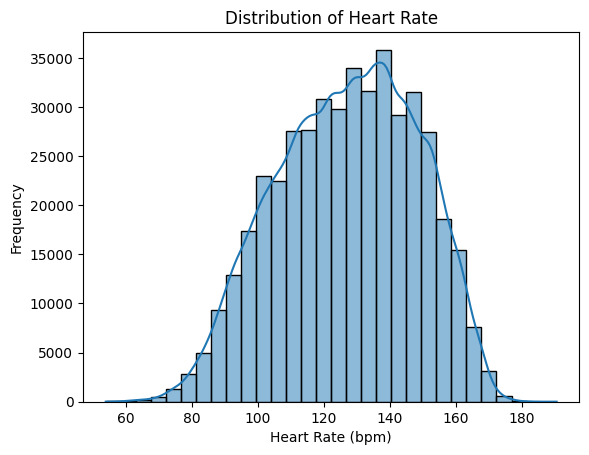

In [ ]:
# Plot the distribution of heart rate
sns.histplot(data['heartRate'].dropna(), kde=True, bins=30)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

#### Observaciones

La mayoría de los entrenamientos fueron en zona 1 y 2 (100 a 130 BPMs para el individuo de estudio) y zona 4 - 5 ( > 158 BPMs para el individuo de estudio). No obstante en entrenamientos largos (fondos) y compentencias de larga duración, el ritmo cardíaco tiende a mantenerse en una zona aerobica por lo cual se observa que el ritmo cardiaco predomina alrededor de los 140 BPMs

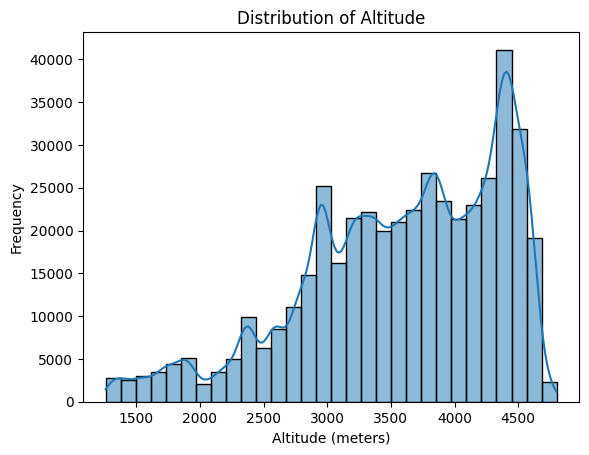

In [ ]:
# Plot the distribution of altitude
sns.histplot(data['altitude'].dropna(), kde=True, bins=30)
plt.title('Distribution of Altitude')
plt.xlabel('Altitude (meters)')
plt.ylabel('Frequency')
plt.show()

#### Observaciones

Al residir en la ciudad de Quito, la mayoria de los entrenamientos largos fueron en altura a ~3000 metros de altura (Quito y sus alrededores principalmente) y ~4500 metros de altura (zona Integrales del Ruco Pichincha)

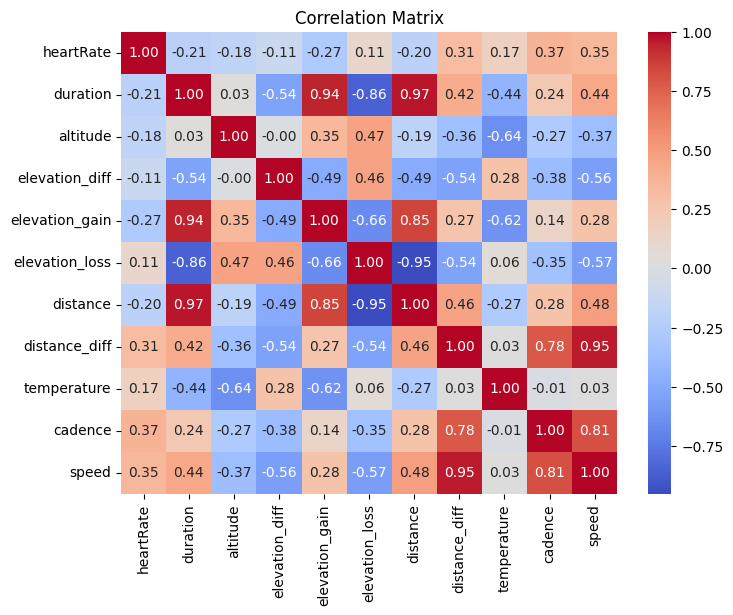

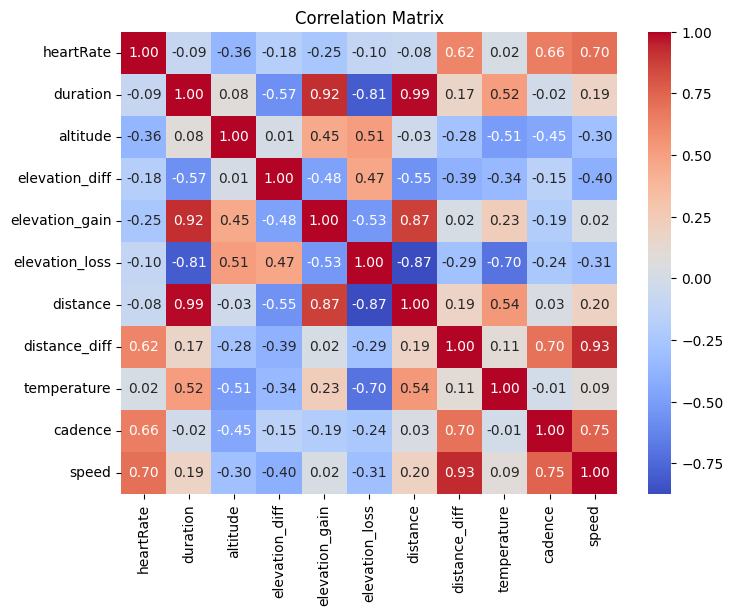

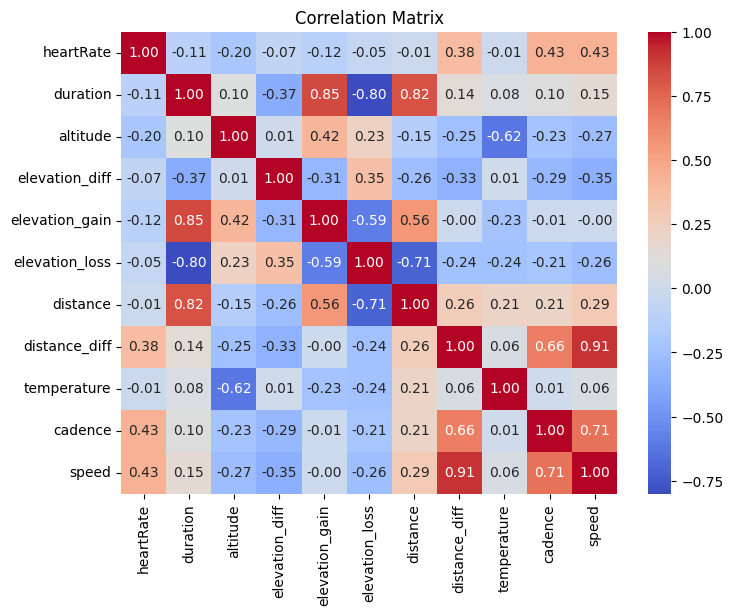

In [ ]:
# Function to calculate and plot correlations between metrics
def plot_metric_correlations(df):
    # Calculate correlation matrix
    correlation_matrix = df.corr()

    # Plot heatmap of correlations
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

# Plot correlations for the first file in the directory
for i, sample_df in enumerate(sample_data_frames[:2]):
    plot_metric_correlations(sample_df.drop(columns=["timestamp", "date"]))

# Plot correlations for the aggregated dataframe
plot_metric_correlations(data.drop(columns=["timestamp", "date"]))


#### Observaciones

Se observa que hay una muy alta correlacion entre la distancia y la duración de la actividad, esto es de esperarse ya que la distancia recorrida siempre incrementa a medida que el corredor va avanzando en el tiempo, no obstante la differencia de distancia por segundo (`distance_diff`) tiene una baja correlación. Esta misma correlación se puede observar entre el desnivel positivo acumulado (`elevation_gain`) y la duración ya que usualmente la velocidad disminuye con el desnivel reduciendo la distancia que se avanza por cada intervalo de tiempo.

Debido a que el muestreo es de 1Hz es decir cada medida se toma por cada segundo, `distance_diff` puede interpretarse como una medida de velocidad, es por eso que también es de esperarse una alta correlación entre esta métrica y la velocidad (medida en min/km).

En menor medida se puede observar también que hay cierta correlación entre la cadencia y la velocidad (y por ende la diferencia de distancia). Una mayor cadencia no necesariamente implica mayor velocidad, pero en muchos casos si, si es que se mantiene un tamaño de zancada constante.

### Visualización con TSNE

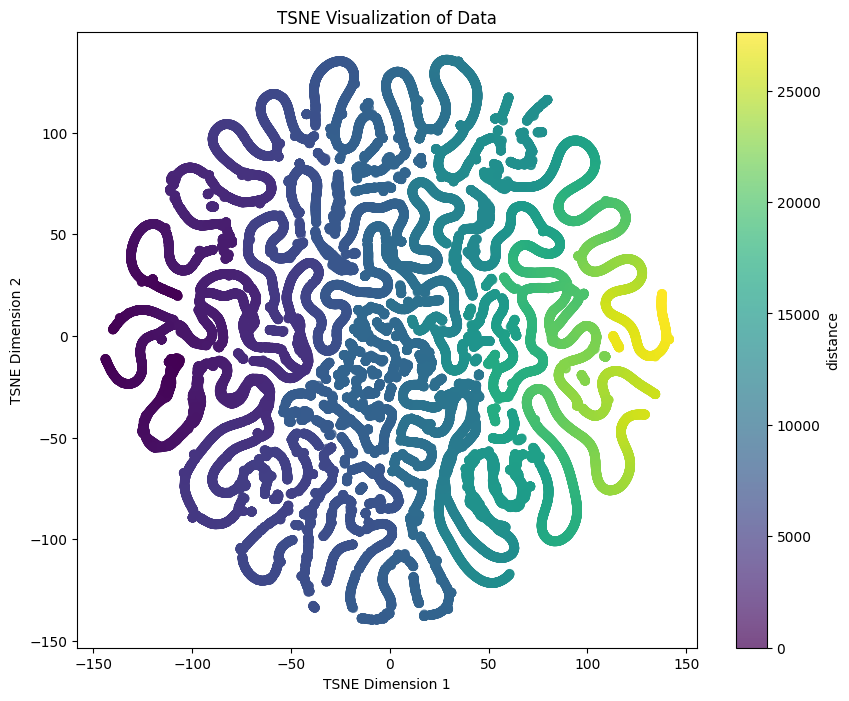

In [ ]:
# About 90% of the code in this cell was generated with Copilot
# Prompt: Add a TSNE visualization for the data in 2 dimensions using distance_diff as the color.

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Select a subset of features for TSNE
tsne_features = ["heartRate", "altitude", "speed", "cadence", "distance"]
# Join a subset of the sample dataframes into a single dataframe
sample_data = pd.concat(sample_data_frames[:5], ignore_index=True)
tsne_data = sample_data[tsne_features].dropna()

# Apply TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(tsne_data)

# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    tsne_results[:, 0],
    tsne_results[:, 1],
    c=tsne_data["distance"],
    cmap="viridis",
    alpha=0.7,
)
plt.colorbar(scatter, label="distance")
plt.title("TSNE Visualization of Data")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.show()

In [ ]:
%pip install tslearn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 5.9 MB/s eta 0:00:00


#### Observaciones:

Por temas de tiempo de ejecución se realizó solo en subconjunto de datos. De todas maneras no se observa grupos muy definidos, posiblemente debido a que no se toma en cuenta la dependencia de las muestras sobre los muestreos anteriores.

No obstante, existe una investigación titulada [m-TSNE: A Framework for Visualizing High-Dimensional Multivariate Time Series](https://export.arxiv.org/pdf/1708.07942v1.pdf) en la que utiliza una métrica de distancia para la similaridad de los datos en un dataset de series de tiempo multivariable.

In [ ]:
# About 90% of code Generated with ChatGPT using the following prompt:
# "Add a m-TSNE visualization for the data in 2 dimensions using DTW distance as the metric."
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tslearn.metrics import dtw
from tqdm import tqdm

mtsne_features = ["heartRate", "altitude", "speed", "cadence"]
# Using only one training session for m-TSNE for execution time reasons
mtsne_data = sample_data_frames[0].drop(columns=['date'])
mtsne_data = mtsne_data[mtsne_features].values
labels = sample_data_frames[0]["distance"].values

# Step 1: Compute pairwise distance matrix using DTW
n = mtsne_data.shape[0]
distance_matrix = np.zeros((n, n))

print("Computing DTW distance matrix (this may take time)...")
for i in tqdm(range(n)):
    for j in range(i + 1, n):
        dist = dtw(mtsne_data[i], mtsne_data[j])
        distance_matrix[i, j] = dist
        distance_matrix[j, i] = dist


Computing DTW distance matrix (this may take time)...


100%|██████████| 10599/10599 [1:04:11<00:00,  2.75it/s] 


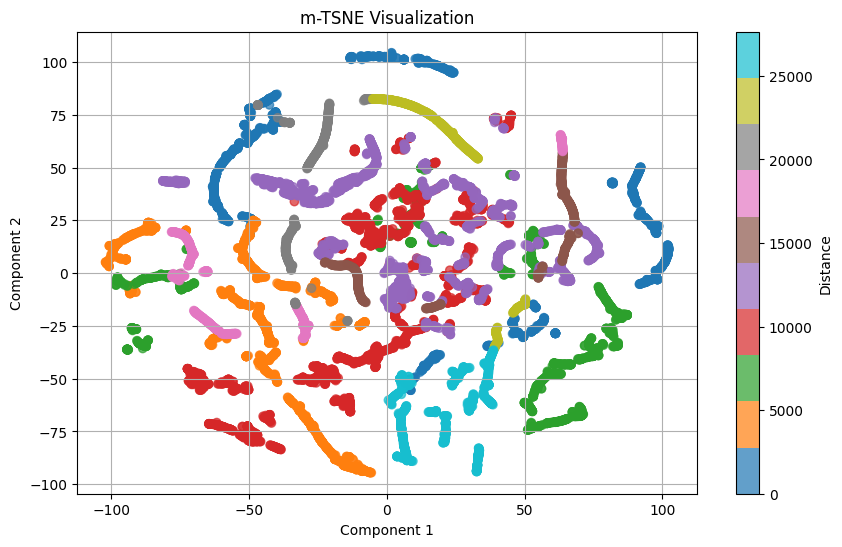

In [ ]:
# Step 2: Apply t-SNE with precomputed distance matrix
tsne = TSNE(n_components=2, metric="precomputed", init='random', random_state=42)
embedding = tsne.fit_transform(distance_matrix)

# Step 3: Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    embedding[:, 0], embedding[:, 1], c=labels, cmap="tab10", alpha=0.7
)
plt.colorbar(scatter, label="Distance")
plt.title("m-TSNE Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


#### Observaciones:

Se puede observar una representación visual con clusters mas separados de los datos aunque el costo computacional de la matriz de distancias es muy alto en este caso.

## Feature Selection (Filter)

En ésta sección se implementará una técnica de feature selection utilizando `SelectKBest` y `GroupTimeSeriesSplit`.

### Lag Features

Es común en datasets de series de tiempo trabajar con *Lag Features* que es una técnica para incorporar en las muestras información sobre los eventos del pasado que consiste en crear nuevos features desplazando la linea del tiempo un cierto intervalo. Ésto permite usar modelos convencionales para hacer predicciones sobre el dataset.

In [ ]:
# Partially generated by copilot autocomplete feature
# No prompts were used
import math

# Create feature lags
def create_feature_lags(df, feature, lag=1, periods=1):
    """
    Create lagged features for a given feature in the DataFrame.
    """
    if periods == 1:
        df[f"{feature}_lag_{lag}"] = df[feature].shift(lag)
    else:
        df[f"{feature}_lag_{lag}"] = (
            df[feature]
            .shift(periods * (lag - 1) + 1)
            .rolling(window=periods)
            .mean()
        )
    # Fill NaN values with the mean of the feature
    df[f"{feature}_lag_{lag}"].fillna(df[feature].mean(), inplace=True)
    return df


# Create lagged features for heart rate, elevantion_diff, cadence, and temperature
for frame in data_frames:
    for lag in range(1, 11):
        frame = create_feature_lags(frame, "heartRate", lag, 60)
        frame = create_feature_lags(frame, "elevation_diff", lag, 60)
        frame = create_feature_lags(frame, "cadence", lag, 60)
        frame = create_feature_lags(frame, "temperature", lag, 60)

data_lags = pd.concat(data_frames, ignore_index=True)

# Check the dimensions of the new DataFrame
print(data_lags.shape)

(445949, 53)


### Conjuntos de entrenamiento, validación y prueba

Luego de crear los feature lags, es necesario dividir el dataset en entrenamiento, validación y pruebas. Primero separando un conjunto de datos para las pruebas posteriores. Y luego realizar las divisiones correspondientes sobre el conjunto de datos restante. En este caso los datos estan agrupados por cada uno de los entrenamientos pero también cada entrenamiento corresponde a un conjunto de series de tiempo por lo que se necesitan considerar los dos casos. La clase `GroupTimeSeriesSplit` de la libreria [`mlxtend`](https://rasbt.github.io/mlxtend/user_guide/evaluate/GroupTimeSeriesSplit/) implementa lo necesario para poder llevar a cabo este proceso

In [ ]:
%pip install mlxtend --quiet

In [ ]:
# Ensure there are no NaN values in the DataFrame. Fill with 0
data_lags.fillna(0, inplace=True)

# Divide by unique dates into test and train sets
# Keep the corresponding training session groups
# Only 2025 sessions will be used for ultimate model testing
from datetime import datetime

# Convert the comparison string to a datetime.date object
comparison_date = datetime.strptime("2025-01-01", "%Y-%m-%d").date()

train_val_data = data_lags[data_lags["date"] < comparison_date]
test_data = data_lags[data_lags["date"] >= comparison_date]

# Ensure the data is sorted by date and duration
train_val_data.sort_values(by=["date", "duration"], inplace=True)
test_data.sort_values(by=["date", "duration"], inplace=True)

<ipython-input-46-29044d1bf4ed>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-46-29044d1bf4ed>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Se procede a llevar a cabo la selección de features usando `SelectKBest` con distintos valores de `k` y usando `mutual_info_regression` como métrica de score.

Scikit-learn provee la clase [`TimeSeriesSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) que incorpora un mecanismo de validación cruzada para conjuntos de datos correspondientes a series de tiempo. Desafortunadamente, la naturaleza de los datos no permite utilizar esta clase directamente ya que cada sesión de entrenamiento es diferente una de otra.

Afortunadamente, la libreria `mlxtend` contiene la clase [GroupTimeSeriesSplit](https://rasbt.github.io/mlxtend/user_guide/evaluate/GroupTimeSeriesSplit/) que es compatible con scikit-learn y permite la agrupación adecuada de los conjuntos de series de tiempo

In [ ]:
# Code partially generated with ChatGPT and Copilot assistance
# Prompt:   "Use https://rasbt.github.io/mlxtend/user_guide/evaluate/GroupTimeSeriesSplit/
#           to implement feature selection with scikit-learn using SelectKBest
#           with mutual_info_regression."

# Code was updated to implement a pipeline and cross_val_score
# which wasn't initially suggested by chatGPT

import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from mlxtend.evaluate.time_series import GroupTimeSeriesSplit, plot_splits
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import Pipeline

# Extract X and y datasets for training
# Filter train_val_data to test with smaller dataset (last years only) for time sake
train_val_data_f = train_val_data[
    train_val_data["date"] > datetime.strptime("2024-01-01", "%Y-%m-%d").date()
]
X = train_val_data_f.drop(columns=["timestamp", "date", "distance_diff", "distance"])
y = train_val_data_f["distance"]
# encode date as consecutive integers
dates = pd.to_datetime(train_val_data_f["date"])
groups = pd.factorize(dates)[0]
print(groups)


[0 0 0 ... 7 7 7]


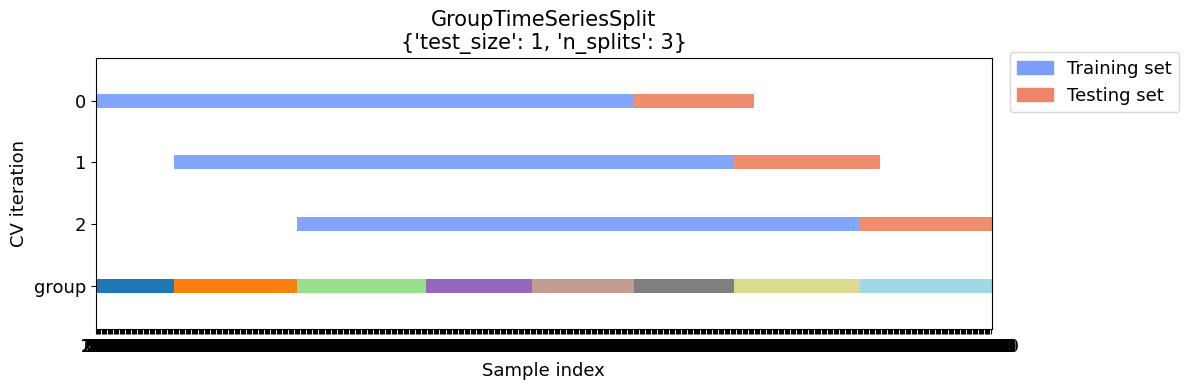

Evaluating k values: [29, 32, 35, 38, 41, 44]
Evaluating k=29...
[CV] END ....................... score: (test=-136356649.627) total time= 1.3min
[CV] END ........................ score: (test=-25827979.725) total time= 1.3min
[CV] END ........................ score: (test=-45837849.528) total time= 1.3min
Evaluating k=32...
[CV] END ....................... score: (test=-129442616.220) total time= 1.4min
[CV] END ........................ score: (test=-25754172.946) total time= 1.5min
[CV] END ........................ score: (test=-47259080.821) total time= 1.5min
Evaluating k=35...
[CV] END ....................... score: (test=-135802998.965) total time= 1.6min
[CV] END ........................ score: (test=-25359987.259) total time= 1.6min
[CV] END ........................ score: (test=-47725109.112) total time= 1.6min
Evaluating k=38...
[CV] END ....................... score: (test=-136937709.594) total time= 1.7min
[CV] END ........................ score: (test=-25413244.902) total 

In [ ]:
# Group-aware time series split
# Set the test size to 20% of the unique groups
test_size = int(0.2 * len(dates.unique()))
# Only 3 split for the sake of time
cv_args = {"test_size": test_size, "n_splits": 3}
plot_splits(X, y, groups, **cv_args)
gtscv = GroupTimeSeriesSplit(**cv_args)

k_scores = {}
k_results = {}

# The Pipeline...
pipeline = Pipeline(
    [
        # ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("feature_selection", SelectKBest(score_func=mutual_info_regression)),
        (
            "model",
            RandomForestRegressor(min_samples_split=100, max_depth=15, random_state=42),
        ),
    ]
)

# Iterate over different values of k for feature selection
k_values = range(X.shape[1] - 20, X.shape[1] - 4, 3)
print(f"Evaluating k values: {list(k_values)}")
for k in k_values:
    print(f"Evaluating k={k}...")
    scores = []
    selected_features = []

    pipeline.set_params(feature_selection__k=k)
    scores = cross_val_score(
        pipeline, X, y, groups=groups, cv=gtscv, scoring="neg_mean_squared_error", verbose=3
    )
    # k_results = cross_validate(
    #     pipeline, X, y, groups=groups, cv=gtscv, verbose=3, return_estimator=True
    # )

    # Store results
    k_scores[k] = scores


In [ ]:
# Select best k value
best_k = max(k_scores, key=lambda k: np.mean(k_scores[k]))
best_score = np.mean(k_scores[best_k])
print(f"Best k value: {best_k} with score: {best_score:.2f}")

Best k value: 32 with score: -67485290.00


### Observaciones:

El tiempo de ejecución es considerablemente alto si es que se considera todo el dataset y un mayor numero de folds asi como varios valores de k.

Para simplificar el proceso y reducir el tiempo de ejecución, se tomó un subconjunto de los datos, asi como menos opciones de evaluación para k y el numero de folds se redujo de 3 a 5

El mejor valor de k encontrado fue de 32 con los parámetros dados

## Comparación de estadística de 2 técnicas de ML

Se van a comparar 2 técnicas de ML para el conjunto de datos:

- Regresión Lineal Regularizada
- NN con TFT (Temporal Fusion Transformers)

### Regresión Lineal Regularizada

#### Librerias requeridas

In [ ]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import GroupTimeSeriesSplit
from sklearn.pipeline import Pipeline
# from sklearn.model_selection import RepeatedKFold

#### Preparación de datos

In [ ]:
# Extract X and y datasets for training
# Filter train_val_data to test with smaller dataset (last year only) for time sake
# train_val_data_s = train_val_data[train_val_data["date"] > datetime.strptime("2024-01-01", "%Y-%m-%d").date()]
X = train_val_data.drop(columns=["timestamp", "date", "distance_diff", "distance"])
y = train_val_data["distance"]
# According to GroupTimeSeriesSplit documentation, the groups should be sequential
dates = pd.to_datetime(train_val_data["date"])
groups = pd.factorize(dates)[0]
X_test = test_data.drop(columns=["timestamp", "date", "distance_diff", "distance"])
y_test = test_data["distance"]
# dates_test = pd.to_datetime(test_data["date"])
# groups_test = pd.factorize(dates)[0]

#### Pipeline

In [ ]:
lr_pipeline = Pipeline([
    # ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ("feature_selection", SelectKBest(score_func=mutual_info_regression, k=best_k)),
    ('ridge', Ridge(max_iter=1000, random_state=42)),
])

#### Optimización de hyperparámetros

Se utilizará `GroupTimeSeriesSplit` en lugar de `RepeatedKFold` por el tipo de problema.

In [ ]:
param_grid = {"ridge__alpha": np.logspace(-3, 4, 5)}
print("CV Params:", param_grid)
test_size = int(0.2 * len(dates.unique()))
cv_args = {"test_size": test_size, "n_splits": 5}
gtscv = GroupTimeSeriesSplit(**cv_args)

grid = GridSearchCV(
    lr_pipeline,
    param_grid,
    cv=gtscv,
    scoring="neg_mean_squared_error",
    verbose=3,
    return_train_score=True,
)
grid.fit(X, y, groups=groups)

print("Best parameters found:", grid.best_params_)
print("Best score:", grid.best_score_)

CV Params: {'ridge__alpha': array([1.00000000e-03, 5.62341325e-02, 3.16227766e+00, 1.77827941e+02,
       1.00000000e+04])}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ridge__alpha=0.001;, score=(train=-8243507.319, test=-46003253.119) total time= 1.5min
[CV 2/5] END ridge__alpha=0.001;, score=(train=-8033845.145, test=-48018920.213) total time= 1.5min
[CV 3/5] END ridge__alpha=0.001;, score=(train=-7838910.344, test=-48838233.017) total time= 1.5min
[CV 4/5] END ridge__alpha=0.001;, score=(train=-9818659.464, test=-37453858.769) total time= 1.5min
[CV 5/5] END ridge__alpha=0.001;, score=(train=-9512804.390, test=-35642465.774) total time= 1.5min
[CV 1/5] END ridge__alpha=0.056234132519034905;, score=(train=-8243507.319, test=-46003289.624) total time= 1.5min
[CV 2/5] END ridge__alpha=0.056234132519034905;, score=(train=-8033845.145, test=-48018956.667) total time= 1.5min
[CV 3/5] END ridge__alpha=0.056234132519034905;, score=(train=-7838910.344, test=-4883

### Visualización de resultados

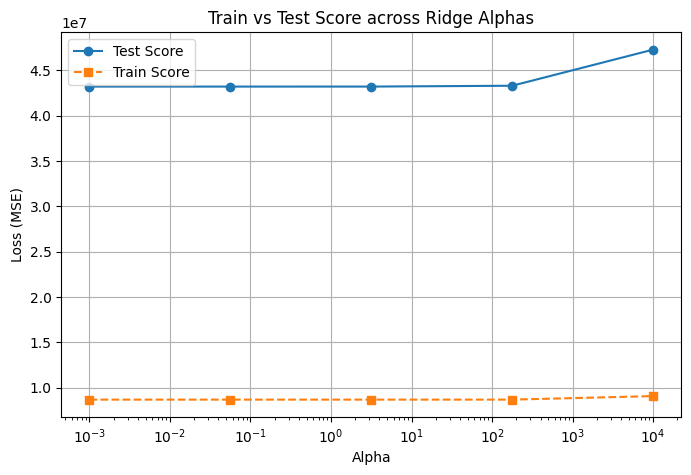

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract alphas and scores
results = grid.cv_results_
alphas = [params['ridge__alpha'] for params in results['params']]

# Convert negative MSE to positive for interpretability (optional)
mean_test_scores = -np.array(results['mean_test_score'])
std_test_scores = np.array(results['std_test_score'])

mean_train_scores = -np.array(results['mean_train_score'])
std_train_scores = np.array(results['std_train_score'])

# Plot
plt.figure(figsize=(8, 5))
plt.plot(alphas, mean_test_scores, label='Test Score', marker='o')
plt.plot(alphas, mean_train_scores, label='Train Score', marker='s', linestyle='--')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Loss (MSE)')
plt.title('Train vs Test Score across Ridge Alphas')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



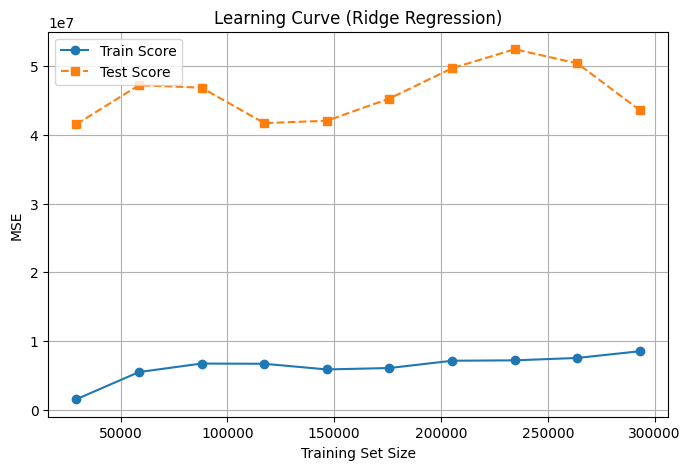

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Use the best parameter (e.g., ridge__alpha from GridSearchCV)
best_alpha = grid.best_params_['ridge__alpha']
lr_pipeline.set_params(ridge__alpha=best_alpha)

# Define train sizes (fractions or absolute numbers)
train_sizes = np.linspace(0.1, 1.0, 10)

# Reuse the same cross-validator
train_sizes, train_scores, test_scores = learning_curve(
    lr_pipeline,
    X, y,
    groups=groups,
    train_sizes=train_sizes,
    cv=gtscv,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    return_times=False
)

# Convert negative MSE to positive
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Train Score')
plt.plot(train_sizes, test_scores_mean, 's--', label='Test Score')

plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve (Ridge Regression)')
plt.legend()
plt.grid(True)
plt.show()

#### Entrenamiento y Evaluación

In [ ]:
# Use best alpha to set the pipeline estimator
lr_pipeline.set_params(ridge__alpha=grid.best_params_["ridge__alpha"])
lr_pipeline.fit(X, y)

# Evaluate the model
y_pred = lr_pipeline.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {lr_mse:.2f}")

Mean Squared Error: 6659499.52


### Neural Network con TFT (Temporal Fusion Transformers)

Existen varios modelos y técnicas útiles que se pueden aplicar sobre problemas de series de tiempo (LSTM, ARIMA, entre otros). No obstante, [An In-Depth Exploration of Temporal Fusion Transformers for Time Series Forecasting](https://medium.com/ai-simplified-in-plain-english/an-in-depth-exploration-of-temporal-fusion-transformers-for-time-series-forecasting-91e74040a079) explora las ventajas de usar Temporal Fusion Transformers en cuanto a precisión e interpretabilidad en datos secuenciales dado su mecanismo de atención a los sucesos por lo que se procederá a implementar con pytorch usando ésta técnica

#### Librerias requeridas

In [ ]:
%pip install pytorch-lightning --quiet
%pip install pytorch-forecasting --quiet
%pip install optuna --quiet
%pip install optuna[visualization] --quiet

In [ ]:
# About 80% of the code was generated with ChatGPT and Copilot assistance
# Prompt: "Add a pytorch-lightning model using the Temporal Fusion Transformer (TFT) from pytorch-forecasting."
# Prompt: "Implement hyperparameter optimization for the pytorch-lightning tft model"

import lightning.pytorch as pl
import torch.nn as nn
import torch
from torch.utils.data import DataLoader
# from pytorch_lightning import Trainer
from lightning.pytorch import Trainer
from pytorch_forecasting import TimeSeriesDataSet, Baseline, metrics
from pytorch_forecasting.data import NaNLabelEncoder, GroupNormalizer
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
from pytorch_forecasting.data.encoders import TorchNormalizer
from pytorch_forecasting.models.temporal_fusion_transformer import TemporalFusionTransformer
import optuna


#### Dataset

In [ ]:
# 0   timestamp       445949 non-null  datetime64[ns]
#  1   heartRate       445902 non-null  float64
#  2   duration        445949 non-null  float64
#  3   altitude        445949 non-null  float64
#  4   elevation_diff  445949 non-null  float64
#  5   elevation_gain  445949 non-null  float64
#  6   elevation_loss  445949 non-null  float64
#  7   distance        445937 non-null  float64
#  8   distance_diff   445949 non-null  float64
#  9   temperature     445949 non-null  float64
#  10  cadence         445939 non-null  float64
#  11  speed           445939 non-null  float64
#  12  date            445949 non-null  object

# --- Configuration ---
min_prediction_length = 1
max_prediction_length = 6  # Forecast horizon
min_encoder_length = 12
max_encoder_length = 24  # History length
batch_size = 64

# --- Group-aware TimeSeriesDataSet ---
# data.set_index("duration", inplace=True)
data["duration"] = data["duration"].astype(int)
training_cutoff = data["duration"].max() - max_prediction_length

training = TimeSeriesDataSet(
    data[lambda x: x["duration"] <= training_cutoff],
    time_idx="duration",
    target="distance",
    group_ids=["date"],
    max_encoder_length=max_encoder_length,
    min_encoder_length=min_encoder_length,
    min_prediction_length=min_prediction_length,
    max_prediction_length=max_prediction_length,
    # static_categoricals=[],
    # time_varying_known_categoricals=[],
    time_varying_known_reals=[
        "duration",
        "heartRate",
        "altitude",
        "elevation_diff",
        "elevation_gain",
        "elevation_loss",
        "temperature",
        "cadence",
        "speed",
    ],
    time_varying_unknown_reals=["distance"],
    target_normalizer=GroupNormalizer(
        groups=["date"], transformation="softplus"
    ),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True,
)

# Create validation set
validation = TimeSeriesDataSet.from_dataset(training, data, predict=True, stop_randomization=True)

# DataLoaders
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)


### Model and Hyperparameter Optimization

Para la optimización de hiperparámetros se utilizó la libreria `optuna` que implementa un algoritmo de busqueda con enfoque probabilistico y compatible con la libreria utilizada. También es posible utilizar `Tuner` [6] provisto por pytorch pero `optuna` parece ser mejor opción para optimizar multiples parametros. La librería integra la utilización de optuna dentro de su implementación que se puede invocar a través de la función ` optimize_hyperparameters` sin embargo una implementación a través de optuna permite entender y tener más control sobre la implementación del estudio.

Para la optimización de hiperparámetros se escogieron 4:
* **hidden_size:** El tamaño de la red oculta que es quizas el principal hiperparámetro a probar. Dado el número de características, un valor máximo de 64 suena apropiado.
* **attention_head_size:** Parte primordial de la técnica de transformers aplicada por el algoritmo y un valor al cual poner atención
* **dropout:** Porcentaje de neuronas a apagar aleatoreamente durante entrenamiento para mejorar el aprendizaje
* **learning_rate:** Uno de los principales hiperparámetros a optimizar en redes neuronales que aplican alguna técnica de GD con el fin de optimizar el tiempo de ejecución y al mismo tiempo evitar caer en minimos locales.

In [ ]:
def objective(trial):
    # Suggest hyperparameters
    hidden_size = trial.suggest_int("hidden_size", 8, 64)
    attention_head_size = trial.suggest_int("attention_head_size", 1, 4)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)

    # Define model
    model = TemporalFusionTransformer.from_dataset(
        training,
        hidden_size=hidden_size,
        attention_head_size=attention_head_size,
        dropout=dropout,
        learning_rate=learning_rate,
        loss=metrics.RMSE(),
        log_interval=0,
        reduce_on_plateau_patience=2,
    )

    # Callbacks
    early_stop = EarlyStopping(monitor="val_loss", patience=3, mode="min")

    # Trainer
    trainer = Trainer(
        max_epochs=20,
        accelerator="auto",
        limit_train_batches=500,
        callbacks=[early_stop],
        enable_model_summary=False,
        logger=False,
    )

    trainer.fit(model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

    val_loss = trainer.callback_metrics["val_loss"].item()
    return val_loss

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("Best trial:")
print(study.best_trial.params)

[I 2025-05-14 15:02:25,511] A new study created in memory with name: no-name-5125c075-04eb-4fc7-bf78-88b6880b8bbb
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:209: UserWarning:

Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:209: UserWarning:

Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
I

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.



Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-14 15:08:19,084] Trial 0 finished with value: 594.3088989257812 and parameters: {'hidden_size': 32, 'attention_head_size': 4, 'dropout': 0.24186400547472184, 'learning_rate': 0.0006986761989040458}. Best is trial 0 with value: 594.3088989257812.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
I

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-14 15:14:15,757] Trial 1 finished with value: 923.8131103515625 and parameters: {'hidden_size': 64, 'attention_head_size': 4, 'dropout': 0.17535490937066545, 'learning_rate': 0.004041911517094966}. Best is trial 0 with value: 594.3088989257812.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
IN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-14 15:25:54,185] Trial 2 finished with value: 675.0055541992188 and parameters: {'hidden_size': 9, 'attention_head_size': 4, 'dropout': 0.1971914793106734, 'learning_rate': 0.0005788271465834207}. Best is trial 0 with value: 594.3088989257812.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INF

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-14 15:43:41,602] Trial 3 finished with value: 215.54666137695312 and parameters: {'hidden_size': 57, 'attention_head_size': 4, 'dropout': 0.20066841568193775, 'learning_rate': 0.0002586183408112595}. Best is trial 3 with value: 215.54666137695312.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-14 15:49:32,490] Trial 4 finished with value: 778.1549682617188 and parameters: {'hidden_size': 60, 'attention_head_size': 3, 'dropout': 0.21759663876629798, 'learning_rate': 0.002186702146394306}. Best is trial 3 with value: 215.54666137695312.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
I

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-14 15:56:35,795] Trial 5 finished with value: 456.2383117675781 and parameters: {'hidden_size': 15, 'attention_head_size': 4, 'dropout': 0.30250928110147035, 'learning_rate': 0.006256872725604632}. Best is trial 3 with value: 215.54666137695312.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
I

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-14 16:04:52,761] Trial 6 finished with value: 486.4206237792969 and parameters: {'hidden_size': 53, 'attention_head_size': 4, 'dropout': 0.34905083205092985, 'learning_rate': 0.0008644725195646303}. Best is trial 3 with value: 215.54666137695312.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-14 16:14:16,010] Trial 7 finished with value: 302.32177734375 and parameters: {'hidden_size': 62, 'attention_head_size': 4, 'dropout': 0.16453114176532724, 'learning_rate': 0.0006669156953155459}. Best is trial 3 with value: 215.54666137695312.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
IN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-14 16:22:23,726] Trial 8 finished with value: 403.64154052734375 and parameters: {'hidden_size': 49, 'attention_head_size': 3, 'dropout': 0.14449759008470597, 'learning_rate': 0.0029600869831051557}. Best is trial 3 with value: 215.54666137695312.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-14 16:29:16,359] Trial 9 finished with value: 530.7835693359375 and parameters: {'hidden_size': 54, 'attention_head_size': 1, 'dropout': 0.4345912062255948, 'learning_rate': 0.0038542516737129656}. Best is trial 3 with value: 215.54666137695312.


Best trial:
{'hidden_size': 57, 'attention_head_size': 4, 'dropout': 0.20066841568193775, 'learning_rate': 0.0002586183408112595}


In [ ]:
from optuna.visualization import plot_parallel_coordinate

fig = plot_parallel_coordinate(study)
fig.show()

### Re-train with best parameters

In [ ]:
best_params = study.best_trial.params

# Create a logger
logger = TensorBoardLogger("tb_logs", name="tft_model")

tft_best = TemporalFusionTransformer.from_dataset(
    training,
    **best_params,
    loss=metrics.RMSE(),
)
early_stop = EarlyStopping(monitor="val_loss", patience=3, mode="min")
trainer = Trainer(
    max_epochs=30,
    accelerator="auto",
    limit_train_batches=500,
    callbacks=[early_stop],
    enable_model_summary=False,
    logger=logger,
)
trainer.fit(
    tft_best, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader
)

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# Display tensorboard
# %load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir /content/tb_logs

## Train Loss Step
train_loss_step.svg

## Val Loss
val_loss.svg

In [ ]:
# Load best model
# best_model_path = trainer.checkpoint_callback.best_model_path
# best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

# Predictions on validation set
y_true = torch.cat([y[0] for x, y in iter(val_dataloader)]).to("cuda:0")  # Move to GPU
y_pred = tft_best.predict(val_dataloader) #.to("cuda:0")  # Ensure predictions are on GPU

# Calculate MSE
import torch.nn.functional as F

mse = F.mse_loss(y_pred, y_true)
print(f"MSE: {mse.item():.4f}")

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'predict_dataloader' does not have many workers w

MSE: 74256.3984


### Comparación de modelos

In [ ]:
# About 80% code Generated with ChatGPT
# Prompt: "Add a Wilcoxon test to compare the performance of the sklearn linear regression and pytorch-lightning models."

import pandas as pd
import numpy as np
from mlxtend.evaluate import GroupTimeSeriesSplit
from sklearn.metrics import mean_squared_error
from scipy.stats import wilcoxon

from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from lightning.pytorch import Trainer
import torch

# Sample assumptions
df = train_val_data.copy()
print(df.shape)
# encode date as consecutive integers
dates = pd.to_datetime(df["date"])
df["group"] = pd.factorize(dates)[0]
df["duration"] = df["duration"].astype(int)
df.drop(columns=["timestamp", "date", "distance_diff"], inplace=True)
group_column = "group"
time_column = "duration"
target_column = "distance"

# Sort by group + time
df = df.sort_values([group_column, time_column])

# Set up splitter
cv_args = {"test_size": test_size, "n_splits": 5}
gtscv = GroupTimeSeriesSplit(**cv_args)

tft_errors = []
lr_errors = []

# Prepare data
groups = df[group_column].values
X = df.drop(columns=[target_column])
y = df[target_column].values

for train_idx, test_idx in gtscv.split(X, y, groups):
    df_train = df.iloc[train_idx]
    df_test = df.iloc[test_idx]

    # 1. --- sklearn regression model ---
    lr_pipeline = Pipeline([
        # ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ("feature_selection", SelectKBest(score_func=mutual_info_regression, k=best_k)),
        ('ridge', Ridge(alpha=grid.best_params_["ridge__alpha"]))
    ])
    lr_pipeline.fit(df_train.drop(columns=[target_column, group_column]), df_train[target_column])
    preds_rf = lr_pipeline.predict(df_test.drop(columns=[target_column, group_column]))
    error_rf = mean_squared_error(df_test[target_column], preds_rf, squared=False) #RMSE
    lr_errors.append(error_rf)

    # 2. --- TFT model ---
    # Prepare TimeSeriesDataSet
    # Remove lag features
    df_train = df_train.drop(
        columns=[
            f"{col}_lag_{lag}"
            for col in ["heartRate", "elevation_diff", "cadence", "temperature"]
            for lag in range(1, 11)
        ]
    )
    df_test = df_test.drop(
        columns=[
            f"{col}_lag_{lag}"
            for col in ["heartRate", "elevation_diff", "cadence", "temperature"]
            for lag in range(1, 11)
        ]
    )
    df_train = df_train.sort_values([group_column, time_column])
    df_test = df_test.sort_values([group_column, time_column])
    training = TimeSeriesDataSet(
        df_train,
        time_idx=time_column,
        target=target_column,
        group_ids=[group_column],
        max_encoder_length=max_encoder_length,
        min_encoder_length=min_encoder_length,
        min_prediction_length=min_prediction_length,
        max_prediction_length=max_prediction_length,
        # static_categoricals=[],
        # time_varying_known_categoricals=[],
        time_varying_known_reals=[
            "duration",
            "heartRate",
            "altitude",
            "elevation_diff",
            "elevation_gain",
            "elevation_loss",
            "temperature",
            "cadence",
            "speed",
        ],
        time_varying_unknown_reals=[target_column],
        target_normalizer=GroupNormalizer(
            groups=[group_column], transformation="softplus"
        ),
        add_relative_time_idx=True,
        add_target_scales=True,
        add_encoder_length=True,
        allow_missing_timesteps=True,
    )

    # validation = TimeSeriesDataSet.from_dataset(training, df_test)
    validation = TimeSeriesDataSet(
        df_test,
        time_idx=time_column,
        target=target_column,
        group_ids=[group_column],
        max_encoder_length=max_encoder_length,
        min_encoder_length=min_encoder_length,
        min_prediction_length=min_prediction_length,
        max_prediction_length=max_prediction_length,
        # static_categoricals=[],
        # time_varying_known_categoricals=[],
        time_varying_known_reals=[
            "duration",
            "heartRate",
            "altitude",
            "elevation_diff",
            "elevation_gain",
            "elevation_loss",
            "temperature",
            "cadence",
            "speed",
        ],
        time_varying_unknown_reals=[target_column],
        target_normalizer=training.target_normalizer, # Use normalizer from training
        add_relative_time_idx=True,
        add_target_scales=True,
        add_encoder_length=True,
        allow_missing_timesteps=True,
        # Pass the categorical encoders from the training dataset
        categorical_encoders=training.categorical_encoders,
        scalers=training.scalers # Pass the scalers from the training dataset
    )

    train_dl = training.to_dataloader(train=True, batch_size=32)
    val_dl = validation.to_dataloader(train=False, batch_size=32)

    early_stop = EarlyStopping(monitor="val_loss", patience=3, mode="min")
    trainer = Trainer(
        max_epochs=30,
        accelerator="auto",
        limit_train_batches=1000,
        callbacks=[early_stop],
        enable_model_summary=False,
        logger=False,
    )
    # Ensure the model is reset before training
    tft_best = TemporalFusionTransformer.from_dataset(
        training,
        **best_params,
        loss=metrics.RMSE(),
    )
    trainer.fit(tft_best, train_dl, val_dl)

    preds_tft = tft_best.predict(val_dl)
    actuals = torch.cat([y[0] for x, y in iter(val_dl)])

    # error_tft = mean_squared_error(actuals.cpu().numpy(), preds_tft.cpu().numpy())
    error_tft = trainer.callback_metrics["val_loss"]
    tft_errors.append(error_tft)

(411566, 53)


INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:209: UserWarning:

Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.

/usr/local/lib/python3.10/dist-p

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.



Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'predict_dataloader' does not have many workers w

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.



Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'predict_dataloader' does not have many workers w

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.



Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'predict_dataloader' does not have many workers w

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.



Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'predict_dataloader' does not have many workers w

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.



Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'predict_dataloader' does not have many workers w

[tensor(2841.0068), tensor(3906.5010), tensor(2688.0657), tensor(3111.5237), tensor(2721.4314)]
[6782.569786017756, 6929.568530240773, 6988.435648671168, 6119.9557709522, 5970.131126382179]


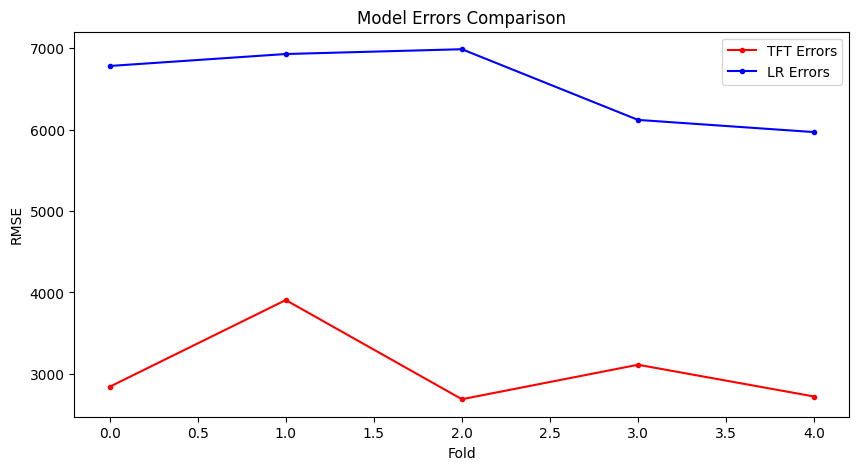

Wilcoxon test statistic: 0.0000
Wilcoxon test p-value: 0.0625
Fail to reject the null hypothesis: There is no significant difference in performance between the two models.


In [ ]:
# 3. --- Wilcoxon Test ---
print(tft_errors)
print(lr_errors)

# Plot tft_errors and lr_errors
plt.figure(figsize=(10, 5))
plt.plot(tft_errors, label="TFT Errors", color="r", marker=".")
plt.plot(lr_errors, label="LR Errors", color="b", marker=".")
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.title("Model Errors Comparison")
plt.legend()
plt.show()

# Perform Wilcoxon signed-rank test
if len(lr_errors) == len(tft_errors) and len(lr_errors) > 1:
    stat, p_value = wilcoxon(lr_errors, tft_errors)
    print(f"Wilcoxon test statistic: {stat:.4f}")
    print(f"Wilcoxon test p-value: {p_value:.4f}")

    # Interpret the result
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in performance between the two models.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in performance between the two models.")
else:
    print("Not enough paired samples to perform Wilcoxon test.")

## Conclusiones

El *análisis de series de tiempo* presenta desafíos metodológicos significativos, particularmente en lo concerniente al tratamiento de datos y la implementación de validaciones rigurosas para evitar el fenómeno de "data leakage". Este problema se manifiesta en dos dimensiones principales: por una parte, la naturaleza secuencial de las series temporales exige validaciones con datos futuros; por otra, la presencia de múltiples registros correspondientes a distintas sesiones de entrenamiento/competencia requiere una estricta segregación en conjuntos diferenciados (entrenamiento o validación) para prevenir la contaminación estadística. La complejidad aumentaría exponencialmente al incorporar datos provenientes de sujetos adicionales al estudio.

Si bien un problema de series temporales puede aparentar simplicidad computacional debido a la limitada cantidad de características y sesiones de actividad deportiva, la agregación de varias sesiones incrementa sustancialmente el volumen del conjunto de datos, pudiendo alcanzar cientos de miles de registros. Adicionalmente, la incorporación de características derivadas mediante técnicas de rezago (lag features) y transformaciones polinomiales puede resultar en un conjunto de datos de dimensiones considerablemente mayores, lo que repercute significativamente en los tiempos de ejecución computacional.

La implementación modular de los diversos componentes, tanto para la preparación del conjunto de datos como para la definición del modelo y la optimización de hiperparámetros, resulta fundamental para la orquestación eficiente del código y su adaptabilidad a las diversas problemáticas emergentes. Esta modularidad facilita asimismo la integración de diferentes bibliotecas para tareas específicas, como la evaluación de modelos. La adherencia a las mejores prácticas de programación durante la implementación de las soluciones contribuye sustancialmente a la organización estructural del código.

En el marco del presente proyecto, se evaluaron dos modelos predictivos distintos (regresión lineal regularizada y redes neuronales) utilizando dos bibliotecas especializadas (scikit-learn y PyTorch). Es particularmente relevante contrastar las diferencias metodológicas entre estos enfoques. La regresión lineal, si bien conceptualmente más sencilla, puede presentar mayores complejidades en el procesamiento de datos, requiriendo características adicionales o procesos complementarios en el pipeline analítico. En contraste, las redes neuronales demandan una comprensión más profunda de su arquitectura subyacente, especialmente al seleccionar los hiperparámetros a optimizar. En cuanto a las bibliotecas empleadas, scikit-learn ofrece un ecosistema consolidado con una API intuitiva, aunque potencialmente limitado para problemáticas más complejas como la implementación de grupos para `TimeSeriesSplit`. Por su parte, PyTorch y su ecosistema asociado proporcionan mayor versatilidad y flexibilidad, exigiendo, no obstante, la adhesión a ciertos estándares como la utilización de interfaces a través de las clases base de Lightning y la aplicación del paradigma orientado a objetos para garantizar la modularidad y extensibilidad de los componentes.

Para este estudio se seleccionó como variable de predicción la distancia, cuya interpretación resulta intuitiva cuando se considera el tiempo en intervalos de magnitud constante, bajo la premisa de determinar la distancia recorrible bajo determinadas condiciones. Sin embargo, este enfoque es susceptible de extensión a múltiples variables de interés. Cabe señalar que la distancia constituye un parámetro estático y predeterminado, al igual que la altura y sus métricas asociadas como el desnivel positivo y negativo (información típicamente disponible en archivos GPX que se distribuyen previamente a entrenamientos o competencias). Consecuentemente, la variable de interés primordial es el tiempo, lo que sugiere, para investigaciones futuras, la conveniencia de implementar técnicas de remuestreo que permitan establecer la distancia en intervalos fijos, reformulando así el problema como una serie temporal basada en la distancia. Asimismo, podrían incorporarse variables adicionales que potencialmente modificarían la dinámica del modelo, tales como las características del terreno, condiciones meteorológicas, puntos estratégicos de alimentación e hidratación, y nivel de esfuerzo percibido.

Una consideración prospectiva adicional consiste en registrar la tipología de sesión. En el proyecto actual se incluyó el conjunto completo de sesiones, tanto de entrenamiento como de competición. Los niveles de esfuerzo y las condiciones previas y durante la competencia pueden diferir significativamente de aquellos en entrenamiento, generando resultados dispares incluso en recorridos idénticos.

Otro factor relevante para análisis futuros son las variaciones en el ritmo. Como se evidenció en el Análisis Exploratorio de Datos (EDA), la variabilidad del ritmo cardíaco experimenta fluctuaciones significativas durante los cambios de cadencia. Este fenómeno podría incidir en la fatiga acumulada durante la actividad, constituyendo así un factor a considerar en investigaciones subsecuentes.

## Referencias

- [1] Nguyen et al., [m-TSNE: A Framework for Visualizing High-Dimensional Multivariate Time Series](https://export.arxiv.org/pdf/1708.07942v1.pdf)
- [2] Sebastian Raschka, [GroupTimeSeriesSplit: A scikit-learn compatible version of the time series validation with groups](https://rasbt.github.io/mlxtend/user_guide/evaluate/GroupTimeSeriesSplit/)
- [3] Lim et al., [Temporal Fusion Transformers for Interpretable Multi-horizon Time Series Forecasting](https://arxiv.org/pdf/1912.09363v3)
- [4] Dmitry Labazkin, [Advanced Group Time Series Validation](https://medium.com/@labdmitriy/advanced-group-time-series-validation-bb00d4a74bcc)
- [5] Mario Dagrada, [ML time series forecasting the right way](https://medium.com/data-science/ml-time-series-forecasting-the-right-way-cbf3678845ff)
- [6] [Demand forecasting with the Temporal Fusion Transformer](https://pytorch-forecasting.readthedocs.io/en/stable/tutorials/stallion.html)

